In [117]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import random
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from random import sample
#from tqdm import tqdm

In [118]:
df = pd.read_csv("Csv_data/all.csv", index_col=[0])
#df = pd.read_csv("Csv_data/recording_1590473015_teco_praktikum_proband1.csv", index_col=[0])

In [119]:
df

,left_acc_x,left_acc_y,left_acc_z,left_gyr_x,left_gyr_y,left_gyr_z,left_quat_w,left_quat_x,left_quat_y,left_quat_z,...,rtls_mapped_position,rtls_state,rtls_x_filtered,rtls_x_unfiltered,rtls_y_filtered,rtls_y_unfiltered,rtls_z_filtered,rtls_z_unfiltered,label,id
2020-05-26 08:04:14.120,-0.219889,-0.481445,-0.724284,-2.234163,-1.024139,-0.543110,0.669796,0.350221,-0.594804,0.273585,...,-1.0,2.0,3.208845,3.208845,1.387482,1.387482,2.668098,2.668098,0.0,0
2020-05-26 08:04:14.140,0.157715,-0.911621,0.000000,-1.587824,-0.408662,-0.025541,0.682057,0.343657,-0.585584,0.271586,...,-1.0,2.0,3.208845,3.208845,1.387482,1.387482,2.668098,2.668098,0.0,0
2020-05-26 08:04:14.160,0.078125,-0.699219,0.000488,0.219230,0.220295,-0.110679,0.685126,0.340926,-0.582634,0.273695,...,-1.0,2.0,3.208845,3.208845,1.387482,1.387482,2.668098,2.668098,0.0,0
2020-05-26 08:04:14.180,0.116211,-0.741211,-0.258626,0.784689,0.472871,-0.222068,0.678902,0.349042,-0.586143,0.271380,...,-1.0,2.0,3.208845,3.208845,1.387482,1.387482,2.668098,2.668098,0.0,0
2020-05-26 08:04:14.200,-0.110840,-1.037109,-0.567871,2.065661,1.073803,-0.128771,0.663965,0.362933,-0.595742,0.269003,...,-1.0,2.0,3.208845,3.208845,1.387482,1.387482,2.668098,2.668098,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-26 18:07:01.200,-0.580078,-0.984538,-0.343913,0.482094,-4.256191,-1.744975,0.342945,-0.490375,-0.273338,-0.752820,...,-1.0,1.0,3.057509,3.064015,1.384443,1.362724,2.326005,2.519745,0.0,29
2020-05-26 18:07:01.220,-0.625000,-0.854980,-0.353027,-0.045762,-4.401635,-1.484594,0.298254,-0.504422,-0.239510,-0.774104,...,-1.0,1.0,3.057509,3.064015,1.384443,1.362723,2.326005,2.519745,0.0,29
2020-05-26 18:07:01.240,-0.705078,-0.825195,-0.502441,0.068110,-4.489966,-1.493108,0.280677,-0.509885,-0.226557,-0.780615,...,-1.0,1.0,3.057509,3.064015,1.384443,1.362723,2.326005,2.519745,0.0,29
2020-05-26 18:07:01.260,-2.483236,1.871094,-4.249674,5.843660,-0.360063,-2.737187,0.248654,-0.555116,-0.236941,-0.756464,...,-1.0,1.0,3.057509,3.064015,1.384443,1.362724,2.326005,2.519745,0.0,29


In [120]:
df.columns

Index(['left_acc_x', 'left_acc_y', 'left_acc_z', 'left_gyr_x', 'left_gyr_y',
       'left_gyr_z', 'left_quat_w', 'left_quat_x', 'left_quat_y',
       'left_quat_z', 'hip_acc_x', 'hip_acc_y', 'hip_acc_z', 'hip_gyr_x',
       'hip_gyr_y', 'hip_gyr_z', 'hip_quat_w', 'hip_quat_x', 'hip_quat_y',
       'hip_quat_z', 'right_acc_x', 'right_acc_y', 'right_acc_z',
       'right_gyr_x', 'right_gyr_y', 'right_gyr_z', 'right_quat_w',
       'right_quat_x', 'right_quat_y', 'right_quat_z', 'rtls_accuracy',
       'rtls_accuracy_radius', 'rtls_mapped_position', 'rtls_state',
       'rtls_x_filtered', 'rtls_x_unfiltered', 'rtls_y_filtered',
       'rtls_y_unfiltered', 'rtls_z_filtered', 'rtls_z_unfiltered', 'label',
       'id'],
      dtype='object')

# Preprocessing 

In [121]:
def split_test_proband(df, proband=5, nrec=6):
    ''' Separate data from one proband as test dataset '''
    train = df[np.floor(df["id"]/nrec) != proband-1]
    test = df[np.floor(df["id"]/nrec) == proband-1]
    return train, test

train_df, test_df = split_test_proband(df)

### Feature selection and scaling

In [122]:
cols_body = ['left_acc_x', 'left_acc_y', 'left_acc_z', 'left_gyr_x', 'left_gyr_y',
       'left_gyr_z', 'left_quat_w', 'left_quat_x', 'left_quat_y',
       'left_quat_z', 'hip_acc_x', 'hip_acc_y', 'hip_acc_z', 'hip_gyr_x',
       'hip_gyr_y', 'hip_gyr_z', 'hip_quat_w', 'hip_quat_x', 'hip_quat_y',
       'hip_quat_z', 'right_acc_x', 'right_acc_y', 'right_acc_z',
       'right_gyr_x', 'right_gyr_y', 'right_gyr_z', 'right_quat_w',
       'right_quat_x', 'right_quat_y', 'right_quat_z']
cols_rtls = ['rtls_state',
       'rtls_x_filtered', 'rtls_x_unfiltered', 'rtls_y_filtered',
       'rtls_y_unfiltered', 'rtls_z_filtered', 'rtls_z_unfiltered']
# Dropped: ['rtls_accuracy', 'rtls_accuracy_radius', 'rtls_mapped_position'] 
# These don't carry any information (See RTLS Exploration)

column_trans = ColumnTransformer(
    [('scale_sensors', StandardScaler(), cols_body),
    ('rtls', 'passthrough', cols_rtls),
    ('target', 'passthrough', ['label']),
    ('id', 'passthrough', ['id'])],
    remainder='drop')

In [123]:
half_window = 15

In [124]:
len(cols_body) + len(cols_rtls)

37

In [125]:
train = column_trans.fit_transform(train_df)
test = column_trans.transform(test_df)

In [126]:
def split_recs(data):
    return {int(ID): data[data[:, -1]==ID, :-1] for ID in set(data[:,-1])}
train_recs = split_recs(train)
test_recs = split_recs(test)

In [127]:
def make_window_dataset(ds, window_size, shift=1, stride=1):
  windows = ds.window(window_size, shift=shift, stride=stride)

  def sub_to_batch(sub):
    return sub.batch(window_size, drop_remainder=True)

  windows = windows.flat_map(sub_to_batch)
  return windows

In [128]:
def make_dataset(recordings, half_window):
    fulldata = None
    targets = []
    for rec in recordings.values():
        rec_targets = rec[half_window:-half_window+1,-1].tolist()
        rec_data = tf.data.Dataset.from_tensor_slices(rec[:,:-1])
        windowed_data = make_window_dataset(rec_data, window_size=2*half_window)
        if fulldata is None:
            fulldata = windowed_data
        else:
            fulldata = fulldata.concatenate(windowed_data)
        targets += rec_targets
    return fulldata, targets

In [129]:
train_data, train_targets = make_dataset(train_recs, half_window)
test_data, test_targets = make_dataset(test_recs, half_window)

In [130]:
# Interleave probands

def make_interleaved_dataset(recordings, half_window, nrec=6):
    fulldata = dict()
    targets = dict()
    for id_ in recordings:
        rec = recordings[id_]
        rec_targets = rec[half_window:-half_window+1,-1].tolist()
        rec_data = tf.data.Dataset.from_tensor_slices(rec[:,:-1])
        windowed_data = make_window_dataset(rec_data, window_size=2*half_window)
        
        pid = int(np.floor(id_/nrec))
        if pid in fulldata:
            fulldata[pid] = fulldata[pid].concatenate(windowed_data)
            targets[pid] += rec_targets
        else:
            fulldata[pid] = windowed_data
            targets[pid] = rec_targets
            
    datasets = []
    for pid in fulldata:
        encoded = tf.keras.utils.to_categorical(targets[pid])
        weights = np.ones(len(targets[pid]))
        weights[np.array(targets[pid]) == 1] = 3
        weights[np.array(targets[pid]) == 2] = 10
        ds = tf.data.Dataset.zip((fulldata[pid], tf.data.Dataset.from_tensor_slices(encoded), tf.data.Dataset.from_tensor_slices(weights)))
        datasets.append(ds)

    choice_dataset = tf.data.Dataset.range(len(datasets)).repeat()
    return tf.data.experimental.choose_from_datasets(datasets, choice_dataset)

traindataset = make_interleaved_dataset(train_recs, half_window)

In [131]:
# Interleave all recordings

def make_interleaved_dataset(recordings, half_window, nrec=6):
    datasets = []
    for rec in recordings.values():
        rec_targets = rec[half_window:-half_window+1,-1].tolist()
        rec_data = tf.data.Dataset.from_tensor_slices(rec[:,:-1])
        windowed_data = make_window_dataset(rec_data, window_size=2*half_window)
        
        encoded = tf.keras.utils.to_categorical(rec_targets)
        weights = np.ones(len(rec_targets))
        weights[np.array(rec_targets) == 1] = 3
        weights[np.array(rec_targets) == 2] = 10
        ds = tf.data.Dataset.zip((windowed_data, tf.data.Dataset.from_tensor_slices(encoded), tf.data.Dataset.from_tensor_slices(weights)))
        datasets.append(ds)

    choice_dataset = tf.data.Dataset.range(len(datasets)).repeat()
    return tf.data.experimental.choose_from_datasets(datasets, choice_dataset)

traindataset = make_interleaved_dataset(train_recs, half_window)

# Model training

In [132]:
batch_size = 90
feature_number = train.shape[1] - 2
n_outputs = 3

In [133]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(half_window*2,feature_number)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

adam = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [134]:
#encoded = tf.keras.utils.to_categorical(train_targets)
#weights = np.ones(len(train_targets))
#weights[np.array(train_targets) == 1] = 3
#weights[np.array(train_targets) == 2] = 10
#traindataset = tf.data.Dataset.zip((train_data, tf.data.Dataset.from_tensor_slices(encoded), tf.data.Dataset.from_tensor_slices(weights)))

encoded = tf.keras.utils.to_categorical(test_targets)
testdataset = tf.data.Dataset.zip((test_data, tf.data.Dataset.from_tensor_slices(encoded)))

EPOCHS = 10
STEPS_PER_EPOCH = 1000

history = model.fit(traindataset.shuffle(1000).repeat().batch(128),
                    validation_data=testdataset.batch(128),
                    epochs=EPOCHS, steps_per_epoch=STEPS_PER_EPOCH)

Epoch 1/10
1000/1000 [==============================] - 49s 49ms/step - loss: 1.1194 - accuracy: 0.6540 - precision_6: 0.6682 - recall_6: 0.6172 - val_loss: 1.0135 - val_accuracy: 0.5364 - val_precision_6: 0.5326 - val_recall_6: 0.4636
Epoch 2/10
1000/1000 [==============================] - 47s 47ms/step - loss: 1.1287 - accuracy: 0.6364 - precision_6: 0.6422 - recall_6: 0.6056 - val_loss: 0.7109 - val_accuracy: 0.6804 - val_precision_6: 0.6844 - val_recall_6: 0.6671
Epoch 3/10
1000/1000 [==============================] - 47s 47ms/step - loss: 1.0574 - accuracy: 0.6615 - precision_6: 0.6729 - recall_6: 0.6339 - val_loss: 0.9604 - val_accuracy: 0.5602 - val_precision_6: 0.5473 - val_recall_6: 0.5017
Epoch 4/10
1000/1000 [==============================] - 49s 49ms/step - loss: 1.0735 - accuracy: 0.6436 - precision_6: 0.6485 - recall_6: 0.6191 - val_loss: 0.7230 - val_accuracy: 0.6389 - val_precision_6: 0.6425 - val_recall_6: 0.5695
Epoch 5/10
1000/1000 [==============================] - 

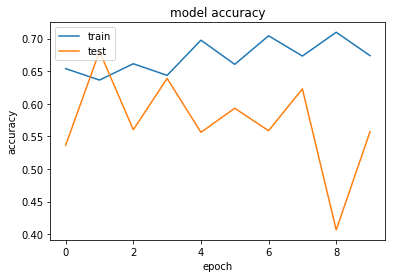

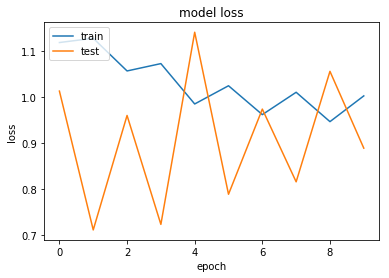

In [135]:
# Plot training statistics

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [136]:
pred_proba = model.predict(train_data.batch(128))
pred = np.argmax(pred_proba, axis=1)

In [137]:
from sklearn.metrics import accuracy_score
print(classification_report(train_targets, pred))

              precision    recall  f1-score   support

         0.0       0.83      0.65      0.73    182978
         1.0       0.58      0.62      0.60     68178
         2.0       0.30      0.98      0.46     16023

    accuracy                           0.66    267179
   macro avg       0.57      0.75      0.60    267179
weighted avg       0.73      0.66      0.68    267179



# Post processing

# Evaluation

In [138]:
pred_proba = model.predict(test_data.batch(128))
pred = np.argmax(pred_proba, axis=1)

In [139]:
print("Results of our Model:")
print(classification_report(test_targets, pred))

Results of our Model:
              precision    recall  f1-score   support

         0.0       0.81      0.57      0.67     64434
         1.0       0.56      0.40      0.47     15557
         2.0       0.14      0.99      0.25      3828

    accuracy                           0.56     83819
   macro avg       0.50      0.65      0.46     83819
weighted avg       0.73      0.56      0.61     83819



In [140]:
baseline = [0]*len(test_targets)
print("Results of the baseline:")
print(classification_report(test_targets, baseline))

Results of the baseline:
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87     64434
         1.0       0.00      0.00      0.00     15557
         2.0       0.00      0.00      0.00      3828

    accuracy                           0.77     83819
   macro avg       0.26      0.33      0.29     83819
weighted avg       0.59      0.77      0.67     83819



In [141]:
x_scale = np.linspace(0, 1, len(test_targets[2000:5000]))

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_scale, y=baseline[2000:5000], mode='markers+lines', name='baseline'))
fig.add_trace(go.Scatter(x=x_scale, y=pred[2000:5000], mode='markers+lines', name='prediction'))
fig.add_trace(go.Scatter(x=x_scale, y=test_targets[2000:5000], mode='markers+lines', name='target'))


fig.show()